In [2]:
# Dependencies

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [3]:
# Import data from .txt file

with open('movie_data.txt') as json_file:
    data = json.load(json_file)

data['1999']['The Sixth Sense']

{'Title': 'The Sixth Sense',
 'Year': '1999',
 'Rated': 'PG-13',
 'Released': '06 Aug 1999',
 'Runtime': '107 min',
 'Genre': 'Drama, Mystery, Thriller',
 'Director': 'M. Night Shyamalan',
 'Writer': 'M. Night Shyamalan',
 'Actors': 'Bruce Willis, Haley Joel Osment, Toni Collette',
 'Plot': 'A boy who communicates with spirits seeks the help of a disheartened child psychologist.',
 'Language': 'English, Latin, Spanish',
 'Country': 'United States',
 'Awards': 'Nominated for 6 Oscars. 37 wins & 56 nominations total',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BMWM4NTFhYjctNzUyNi00NGMwLTk3NTYtMDIyNTZmMzRlYmQyXkEyXkFqcGdeQXVyMTAwMzUyOTc@._V1_SX300.jpg',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '8.1/10'},
  {'Source': 'Rotten Tomatoes', 'Value': '86%'},
  {'Source': 'Metacritic', 'Value': '64/100'}],
 'Metascore': '64',
 'imdbRating': '8.1',
 'imdbVotes': '930,921',
 'imdbID': 'tt0167404',
 'Type': 'movie',
 'DVD': '28 Oct 2016',
 'BoxOffice': '$293,506,292',
 'P

In [4]:
mpaa_rating = {}
mpaa_list = []

for year in list(data.keys()):
    movies = list(data[year].keys())
    mpaa_list = []
    for movie in movies:
        try:
            mpaa_r = data[year][movie]['Rated']
            
            mpaa_list.append(mpaa_r)
        except:
            print(" Year: "+year+" Movie: "+movie)
    mpaa_rating[year] = mpaa_list
res = list(sorted({ele for val in mpaa_rating.values() for ele in val}))
res

 Year: 1980 Movie: In God We Trust (or Gimme That Prime Time Religion)
 Year: 1981 Movie: Indiana Jones and the Raiders of the Lost Ark
 Year: 1981 Movie: Cinderella1981 Re-release
 Year: 1982 Movie: Indiana Jones and the Raiders of the Lost Ark
 Year: 1982 Movie: Cinderella1981 Re-release
 Year: 1982 Movie: Bambi1982 Re-release
 Year: 1982 Movie: Indiana Jones and the Raiders of the Lost Ark1982 Re-release
 Year: 1983 Movie: Snow White and the Seven Dwarfs1983 Re-release
 Year: 1984 Movie: The Jungle Book1984 Re-release
 Year: 1985 Movie: E.T. the Extra-Terrestrial1985 Re-release
 Year: 1986 Movie: One Hundred and One Dalmatians1985 Re-release
 Year: 1987 Movie: Snow White and the Seven Dwarfs1987 Re-release
 Year: 1987 Movie: Cinderella1987 Re-release
 Year: 1988 Movie: Bambi1988 Re-release
 Year: 1988 Movie: The Fox and the Hound1988 Re-release
 Year: 1989 Movie: Peter Pan1989 Re-release
 Year: 1990 Movie: The Jungle Book1990 Re-release
 Year: 1991 Movie: One Hundred and One Dalmati

['Approved',
 'G',
 'N/A',
 'Not Rated',
 'PG',
 'PG-13',
 'Passed',
 'R',
 'TV-14',
 'TV-G',
 'TV-MA',
 'TV-PG',
 'TV-Y',
 'TV-Y7',
 'Unrated']

In [5]:
from collections import Counter
for year in list(mpaa_rating.keys()):
    print(Counter(mpaa_rating[year]))


Counter({'R': 25, 'PG': 21, 'N/A': 1, 'Unrated': 1, 'PG-13': 1})
Counter({'R': 24, 'PG': 20, 'PG-13': 2, 'G': 1, 'N/A': 1})
Counter({'R': 23, 'PG': 22, 'PG-13': 1})
Counter({'R': 28, 'PG': 21})
Counter({'PG': 25, 'R': 18, 'PG-13': 3, 'G': 1, 'TV-Y7': 1, 'Not Rated': 1})
Counter({'R': 19, 'PG': 14, 'PG-13': 14, 'TV-14': 1, 'G': 1})
Counter({'R': 17, 'PG': 16, 'PG-13': 14, 'G': 2})
Counter({'R': 19, 'PG-13': 16, 'PG': 13})
Counter({'R': 26, 'PG': 12, 'PG-13': 7, 'TV-Y': 1, 'G': 1, 'N/A': 1})
Counter({'R': 17, 'PG-13': 14, 'PG': 14, 'N/A': 3, 'G': 1})
Counter({'R': 25, 'PG-13': 13, 'PG': 10, 'G': 1})
Counter({'R': 19, 'PG-13': 17, 'PG': 11, 'G': 1, 'Not Rated': 1})
Counter({'R': 26, 'PG': 12, 'PG-13': 10, 'G': 2})
Counter({'R': 19, 'PG-13': 14, 'PG': 14, 'G': 2})
Counter({'R': 19, 'PG-13': 17, 'PG': 13, 'G': 1})
Counter({'R': 21, 'PG-13': 17, 'PG': 8, 'G': 4})
Counter({'R': 20, 'PG-13': 14, 'PG': 8, 'G': 5, 'TV-14': 1, 'N/A': 1, 'Not Rated': 1})
Counter({'R': 22, 'PG-13': 17, 'PG': 6, 'G'

In [6]:
r_rated = {}
pg_13_rated = {}
pg_rated = {}
g_rated = {}
other_rated = {}

r_list = []
pg_13_list = []
pg_list = []
g_list = []
other_list = []


for year in list(mpaa_rating.keys()):
    r_list = []
    pg_13_list = []
    pg_list = []
    g_list = []
    other_list = []
    for i in list(mpaa_rating[year]):
        if i=='R':
            r_list.append(i)
        elif i=='PG-13':
            pg_13_list.append(i)
        elif i=='PG':
            pg_list.append(i)
        elif i=='G':
            g_list.append(i)
        else:
            other_list.append(i)
        r_list_len = len(r_list)
        pg_13_list_len = len(pg_13_list)
        pg_list_len = len(pg_list)
        g_list_len = len(g_list)
        other_list_len = len(other_list)
    r_rated[year] = r_list_len
    pg_13_rated[year] = pg_13_list_len
    pg_rated[year] = pg_list_len
    g_rated[year] = g_list_len
    other_rated[year] = other_list_len

g_rated['1980']

0

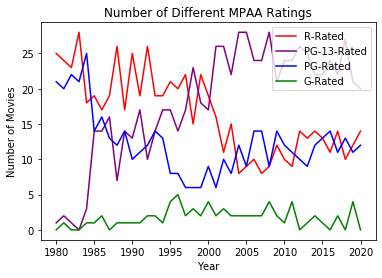

In [7]:
trying_1, = plt.plot(*zip(*sorted(r_rated.items())), color='red')
trying_2, = plt.plot(*zip(*sorted(pg_13_rated.items())), color='purple')
trying_3, = plt.plot(*zip(*sorted(pg_rated.items())), color='blue')
trying_4, = plt.plot(*zip(*sorted(g_rated.items())), color='green')
plt.legend([trying_1, trying_2, trying_3, trying_4], ['R-Rated', 'PG-13-Rated', 'PG-Rated', 'G-Rated'], loc='best')

plt.xticks((0,5,10,15,20,25,30,35,40), 
           labels=('1980', '1985', '1990', '1995', '2000', '2005', '2010', '2015', '2020'))
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Different MPAA Ratings')
plt.show()